In [1]:
!pip install scikit-learn==1.7.2 -q
!pip install  tldextract -q
""" 
kaggle.com/datasets/siddharthkumar25/malicious-and-benign-urls/versions/1
https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset
kaggle.com/datasets/naveenbhadouria/malicious/versions/1
https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning
https://www.kaggle.com/datasets/kaggleprollc/phishing-url-websites-dataset-phiusiil/versions/1
kaggle.com/datasets/joebeachcapital/phishing-urls/versions/1
kaggle.com/datasets/arnavs19/phishing-websites-dataset/versions/1
kaggle.com/datasets/ndarvind/phiusiil-phishing-url-dataset/versions/1
https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset
kaggle.com/datasets/himadri07/malicious-urls-dataset-15k-rows/versions/5
"""[0]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 71.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 3.0 MB/s eta 0:00:00


' '

In [2]:
dataset_paths = []
import numpy as np 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.figure(figsize=(13, 5))  # width=10 inches, height=5 inches
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        dataset_paths.append(os.path.join(dirname, filename))

<Figure size 1300x500 with 0 Axes>

In [3]:
def normalize_labels(label):
    label_str = str(label).strip().lower()
    if label_str in ['benign', 'legitimate', '0']:
        return 0
    elif label_str in ['phishing', 'malware', 'defacement', 'malicious', '1']:
        return 1
    else:
        # Treat unknown labels as malicious for safety or filter them out elsewhere
        return 1

In [4]:
def load_dataset(path):
    try:
        df = pd.read_csv(path)
        # Rename columns to uniform names as needed
        if 'URL' in df.columns:
            df.rename(columns={'URL': 'url'}, inplace=True)
        if 'Label' in df.columns:
            df.rename(columns={'Label': 'label'}, inplace=True)
        if 'type' in df.columns:
            df.rename(columns={'type': 'label'}, inplace=True)
        if 'status' in df.columns:
            df.rename(columns={'status': 'label'}, inplace=True)
        return df[['url', 'label']]
    except Exception as e:
        None
    

In [5]:
dfs = [load_dataset(f) for f in dataset_paths if f]

In [6]:
data = pd.concat(dfs, ignore_index=True)
data['label'] = data['label'].apply(normalize_labels)


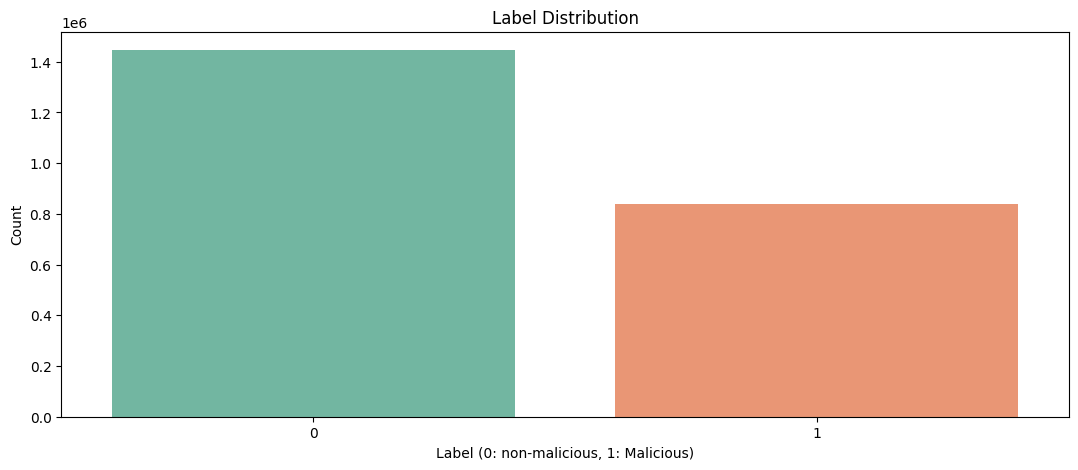

In [7]:
# Label distribution
plt.figure(figsize=(13, 5))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Label Distribution')
plt.xlabel('Label (0: non-malicious, 1: Malicious)')
plt.ylabel('Count')
plt.show()

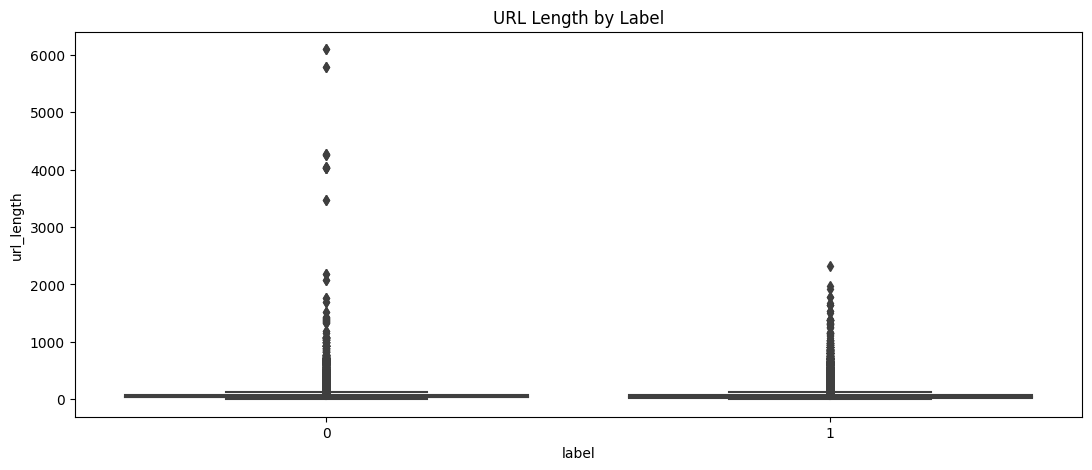

In [8]:
# URL length by class 
plt.figure(figsize=(13, 5))
data['url_length'] = data['url'].apply(len)
sns.boxplot(x='label', y='url_length', data=data)
plt.title("URL Length by Label")
plt.show()

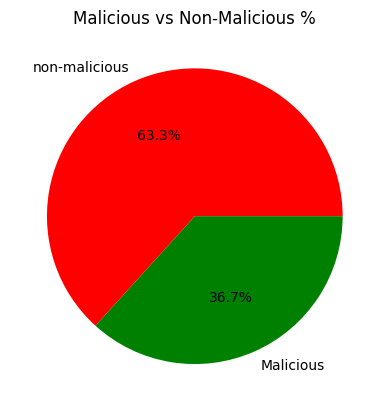

In [9]:
# Pie chart for % malicious vs benign
data['label_bin'] = data['label'].apply(lambda x: 'Malicious' if x == 1 else 'non-malicious')
data['label_bin'].value_counts().plot.pie(autopct='%1.1f%%', colors=['r', 'g'])
plt.title('Malicious vs Non-Malicious %')
plt.ylabel('')
plt.show()


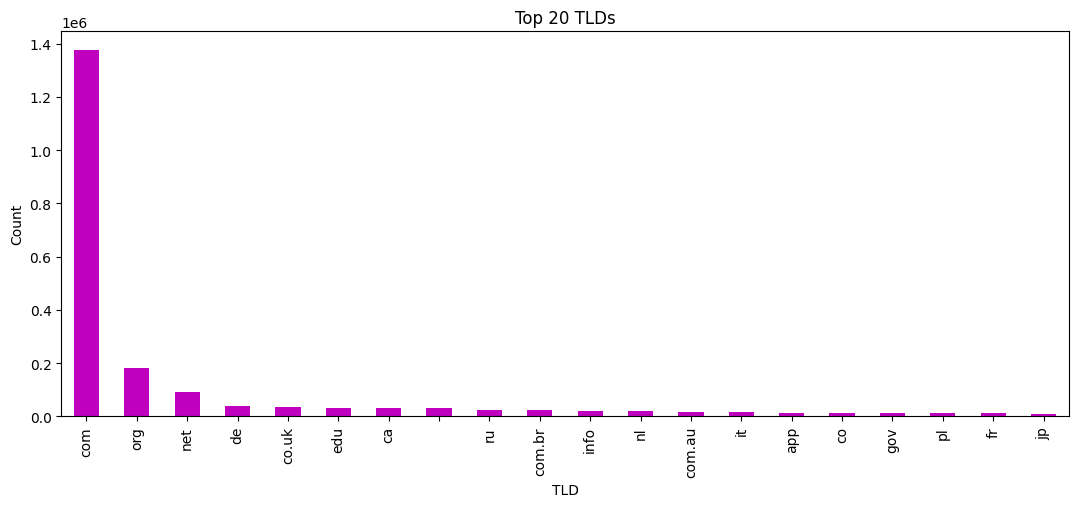

In [10]:
#Top TLDs
import tldextract
plt.figure(figsize=(13, 5))
# Extract correct TLDs using tldextract
data['tld'] = data['url'].apply(lambda x: tldextract.extract(x).suffix if isinstance(x, str) else 'none')
# Get top 20 TLDs
top_tlds = data['tld'].value_counts().head(20)
top_tlds.plot(kind='bar', color='m',)
plt.title("Top 20 TLDs")
plt.xlabel("TLD")
plt.ylabel("Count")
plt.show()


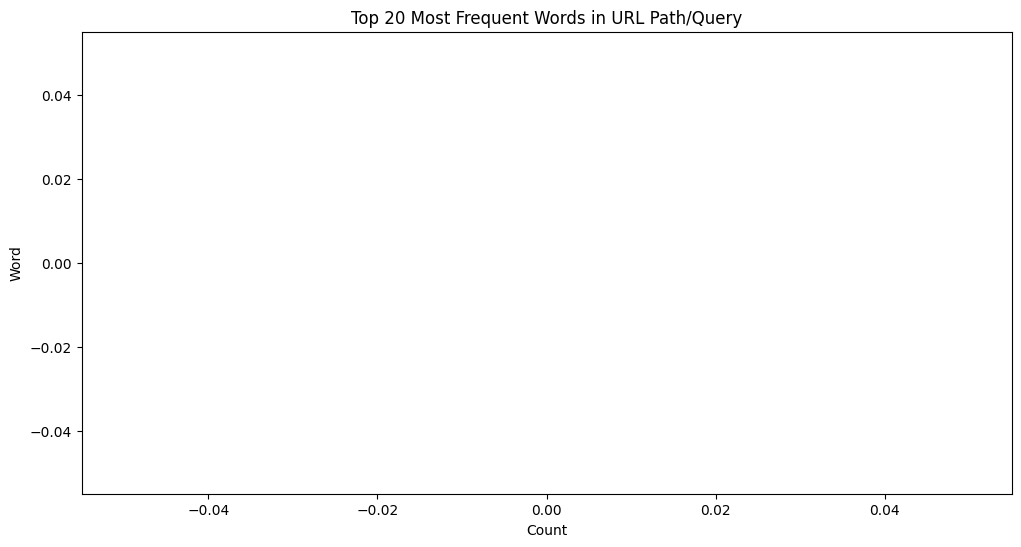

In [11]:
# Word Map / Frequency After the Domain (Path/Query Analysis)
from collections import Counter
import re

# Get the path+query part (after domain)
def get_path_part(url):
    try:
        up = urlparse(str(url))
        return up.path + ('?' + up.query if up.query else '')
    except:
        return ''
data['url_path'] = data['url'].apply(get_path_part)

# Gather words in the path/query, split on delimiters relevant for URLs
word_counter = Counter()
for path in data['url_path']:
    words = re.split(r'[\W\-_=&/?%]+', path)
    word_counter.update(w for w in words if len(w) > 2)

top_words = dict(word_counter.most_common(20))

# Visualize as horizontal bar chart
plt.figure(figsize=(12,6))
plt.barh(list(top_words.keys())[::-1], list(top_words.values())[::-1], color='purple')
plt.title("Top 20 Most Frequent Words in URL Path/Query")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [13]:
data

,url,label,url_length,label_bin,tld,url_path
0,https://www.southbankmosaics.com,1,32,Malicious,com,
1,https://www.uni-mainz.de,1,24,Malicious,de,
2,https://www.voicefmradio.co.uk,1,30,Malicious,co.uk,
3,https://www.sfnmjournal.com,1,27,Malicious,com,
4,https://www.rewildingargentina.org,1,34,Malicious,org,
...,...,...,...,...,...,...
2285323,http://www.fontspace.com/category/blackletter,0,45,non-malicious,com,
2285324,http://www.budgetbots.com/server.php/Server%20...,1,84,Malicious,com,
2285325,https://www.facebook.com/Interactive-Televisio...,0,105,non-malicious,com,
2285326,http://www.mypublicdomainpictures.com/,0,38,non-malicious,com,


In [14]:
X = data['url']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
vectorizer = TfidfVectorizer(
    max_features=500,
    ngram_range=(1, 2)
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_vec, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred = clf.predict(X_test_vec)

print("Accuracy:", (y_pred == y_test).mean())
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.909601676781909

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93    289194
           1       0.86      0.91      0.88    167872

    accuracy                           0.91    457066
   macro avg       0.90      0.91      0.90    457066
weighted avg       0.91      0.91      0.91    457066



In [17]:
import joblib
joblib.dump(clf, 'malicious_url_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [18]:
url = "https:/example.com/"
clf = joblib.load('malicious_url_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')
X_vec = vectorizer.transform([url])
pred = clf.predict(X_vec)[0]
pred


0